# Ann Milk Quality Prediction

## Problem Statement
#### The main goal of this project is to help dairy companies automatically predict the quality of milk using its chemical properties like pH, fat, temperature, and other features. In real-world dairy processing, checking milk quality is often done manually or through lab tests, which can be slow, costly, and sometimes inaccurate. This can lead to poor quality products, customer complaints, or financial loss if bad milk is not caught early. By using a machine learning model like an Artificial Neural Network (ANN), we can build a system that takes the input data from milk and quickly classifies its quality as Low, Medium, or High. This kind of system can be very useful in the dairy industry for sorting milk batches, improving product safety, and making faster decisions. It also reduces the need for manual testing and helps companies maintain consistent quality in their products.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\lokes\Downloads\archive (24)\milknew.csv")

In [4]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


df.head() -> it can show first 5 rows in the data set

# Features

pH
→ Tells how acidic or basic the milk is. Fresh milk usually has a pH around 6.5 to 6.7. A very low or high pH may mean the milk is spoiled.

Temperature
→ The temperature of the milk at the time of testing. Higher temperatures can cause spoilage faster.

Taste
→ Shows whether the milk tastes good or bad. Usually labeled as 1 for good taste and 0 for bad taste.

Odor
→ Tells if the milk smells fresh or has a sour/bad odor. A bad smell can mean the milk is not good.

Fat
→ The amount of fat present in the milk. It affects the richness and quality of milk.

Turbidity
→ Shows how clear or cloudy the milk is. Cloudy milk can indicate poor quality or contamination.

Colour
→ The color of the milk (like white or yellowish). Unusual color may suggest the milk is not fresh or has impurities.

Grade (Target column)
→ The final quality of the milk: Low, Medium, or High. This is what the model tries to predict based on the other features.

In [5]:
df.shape

(1059, 8)

The dataset contains 1059 rows and 8 columns .

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


Total dataset contain 1059 rows and 8 columns are their, 
No null values are present in the dataset 
The dataset include three types of data types
float64: only pH column is float
int64: six columns contains int64 data type they are(Temprature,taste,odor,flat,turbidity,color)
object: Grade column is of object type

# EDA-Exploratory Data Analysis

In [7]:
df.Grade.unique()

array(['high', 'low', 'medium'], dtype=object)

In [8]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


pH -> in pH range is 3 to 9.5, it have slightly left skewed because median is great than mean and most of values in between 6.5 to 6.8

Temprature -> in temprature range 34 to 90, most of the values in between 34 to 45 ,mean > median so it an right skewed

taste -> in taste range 0 to 1 ,55 percent of sample taste = 1

odor -> in odor range 0 to 1 ,43 percent of odor sample are 1 and slightly more sample have 0

fat -> in fat range 0 to 1, 67 percent of fat sample are 1

turbidity -> in turbidity range 0 to 1, it almost 50 percent of 1 and 50 percent of 0

color ->it range is 240 to 255, it low spread with 4.3, it is left skewed

In [9]:
df.describe(include=['O'])

,Grade
count,1059
unique,3
top,low
freq,429


object column is grade in that total 1059 rows are their and there unique(high, low, median), in low have top with 429 frequencies

In [10]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

There is no null values in these data set

In [11]:
def cont_vis_analysis(df,col):
  ## visualisation of continuous numerical variable
  fig,axes=plt.subplots(1,2,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('KDE plot')
  sns.kdeplot(df[col],ax=axes[0])

  axes[1].set_title('Boxplot')
  sns.boxplot(df[col],ax=axes[1])

  fig.show()

def cont_non_vis_analysis(df,col):
  ## Non visual analaysis of continuous numerical data
  series=df[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  # round(2) - round off values upto 2 decimals
  print()


cont_vis_analysis -> These function help to analyze a contionous numeric column from the dataset
create a two side by side plots, figsize(8,3) -> the size of the  plot.
Layout='contrained' -> it can say no plots are overlap.
fig.suptitle('Continuous Data Distributions') -> set the main title above the plot.
KDE plot show the shape of the data and it help you see where the most values are concentrated.
Boxplot -> show the outlier and it can say the spread of the data

cont_non_vis_analysis(df, col)-> these function can give the text summary of continous column.
it can give count, min, max, mean, median, var, std, skew, kurt 

count     1059.00
min          3.00
max          9.50
mean         6.63
median       6.70
var          1.96
std          1.40
skew        -0.68
kurt         1.40
Name: pH, dtype: float64



C:\Users\lokes\AppData\Local\Temp\ipykernel_23816\3115085777.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


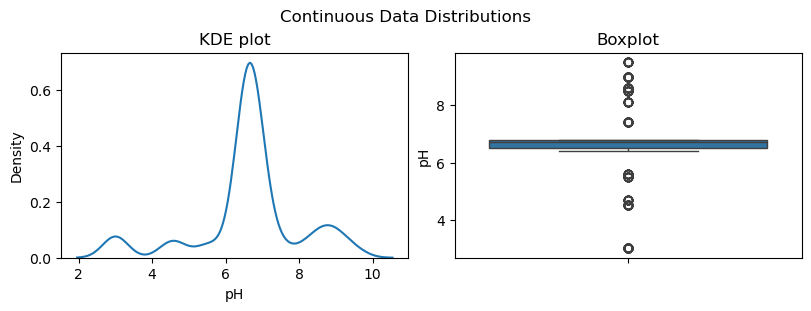

In [12]:
cont_non_vis_analysis(df,'pH')
cont_vis_analysis(df,'pH')

The pH have a outliers are present, kurt is great than 1 so it shows the leptokurtic and it the left skew,skew value is less than 1

count     1059.00
min         34.00
max         90.00
mean        44.23
median      41.00
var        101.98
std         10.10
skew         2.22
kurt         5.87
Name: Temprature, dtype: float64



C:\Users\lokes\AppData\Local\Temp\ipykernel_23816\3115085777.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


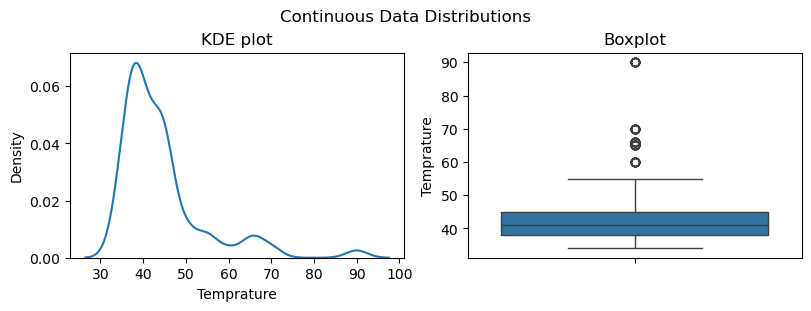

In [13]:
cont_non_vis_analysis(df,'Temprature')
cont_vis_analysis(df,'Temprature')

it shows outliers, the skew value is more than 1 so it is right skew and it is a leptokurtic

count     1059.00
min        240.00
max        255.00
mean       251.84
median     255.00
var         18.55
std          4.31
skew        -1.02
kurt        -0.17
Name: Colour, dtype: float64



C:\Users\lokes\AppData\Local\Temp\ipykernel_23816\3115085777.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


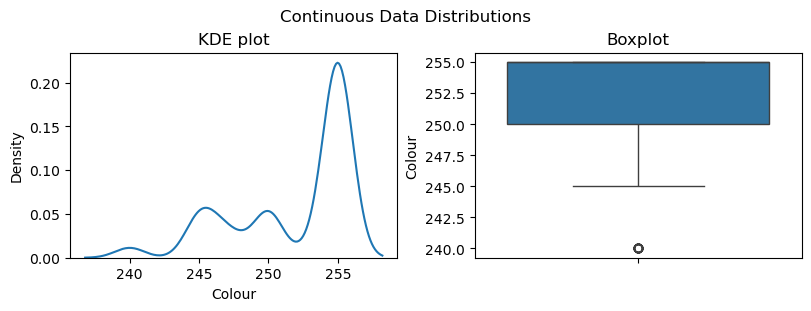

In [14]:
cont_non_vis_analysis(df,'Colour')
cont_vis_analysis(df,'Colour')

In colour it shows one outlier at 240, it is left skew it skew value is less than 1 and its slightly platykurtic

In [15]:
def catg_disc_analysis(df,col):
# this function is used to analyse and visualize a categorical or discrete column in the dataset. 
  print("Value Counts for ",col)
  print(df[col].value_counts())
  # this can show how many time the unique values are appears.
  print("Null values =",df[col].isna().sum())
  # this can check how many null values are in the column.
  fig,axes=plt.subplots(1,2,figsize=(8,3),layout='constrained')
  # create a two side by side plots
  # figsize(8,3) -> the size of the  plot.
  # Layout='contrained' -> it can say no plots are overlap.
  fig.suptitle('Categorical / Discrete Num Data Distributions')
  # set the main title above the plot.
    
  axes[0].set_title('Bar Plot')
  sns.countplot(x=col,data=df,ax=axes[0])
  # It can shows how many times each category appears(how many 1's and 0's).

  axes[1].set_title('Pie Chart')
  vc_data=df[col].value_counts()
  axes[1].pie(vc_data,labels=vc_data.index,autopct='%1.1f%%')
  fig.show()
  #show each category's percentage

Value Counts for  Taste
Taste
1    579
0    480
Name: count, dtype: int64
Null values = 0


C:\Users\lokes\AppData\Local\Temp\ipykernel_23816\2580470.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


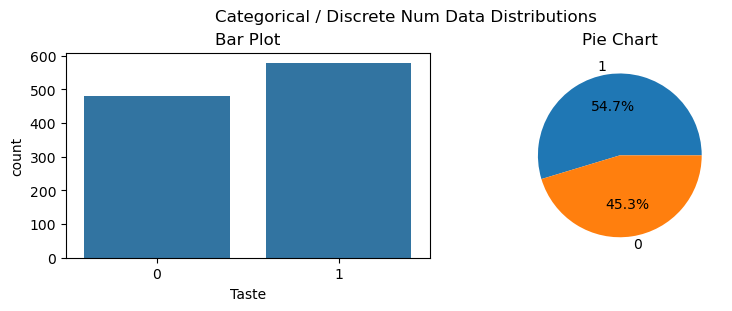

In [16]:
catg_disc_analysis(df,'Taste')

Taste column is binary value 0 and 1 ,579 samples labeled as 1 and 480 samples labeled as 0 ,no missing values

Value Counts for  Odor
Odor
0    601
1    458
Name: count, dtype: int64
Null values = 0


C:\Users\lokes\AppData\Local\Temp\ipykernel_23816\2580470.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


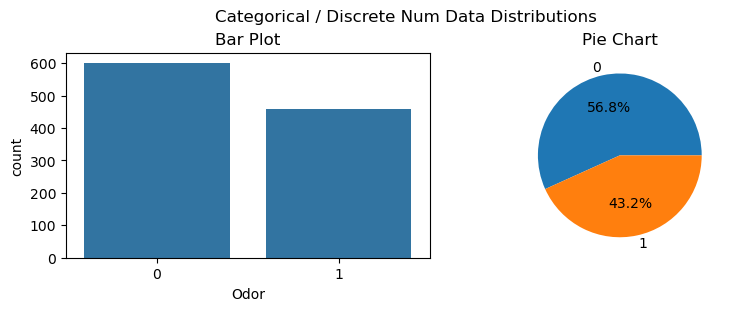

In [17]:
catg_disc_analysis(df,'Odor')

odor column is binary value 0 and 1 ,458 samples labeled as 1 and 601 samples labeled as 0 in these 0 binart value have more labels than 1 ,no missing values

Value Counts for  Fat 
Fat 
1    711
0    348
Name: count, dtype: int64
Null values = 0


C:\Users\lokes\AppData\Local\Temp\ipykernel_25820\1821028851.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


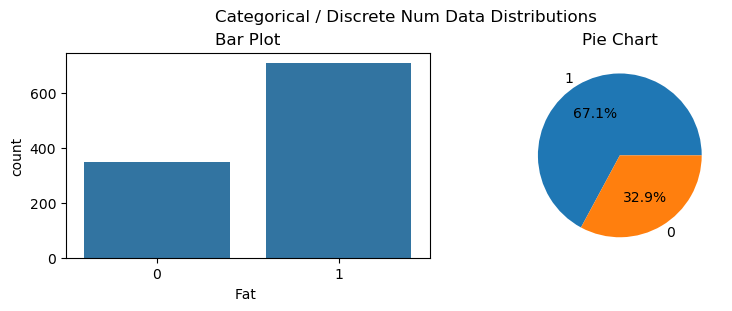

In [18]:
catg_disc_analysis(df,'Fat ')

Fat column is binary value 0 and 1 ,711 samples labeled as 1 and 348 samples labeled as 0 in these 1 binary value have more labels than 0 binary ,no missing values

Value Counts for  Turbidity
Turbidity
0    539
1    520
Name: count, dtype: int64
Null values = 0


C:\Users\lokes\AppData\Local\Temp\ipykernel_23816\2580470.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


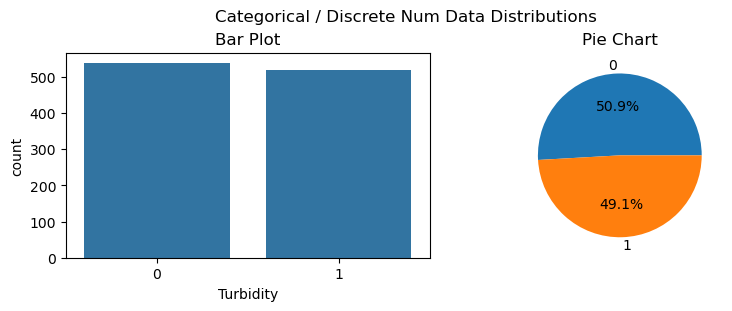

In [18]:
catg_disc_analysis(df,'Turbidity')

Turbidity column is binary value 0 and 1 ,520 samples labeled as 1 and 539 samples labeled as 0 in these 0 binary value have slightly more labels than 1 binary ,no missing values

Value Counts for  Grade
Grade
low       429
medium    374
high      256
Name: count, dtype: int64
Null values = 0


C:\Users\lokes\AppData\Local\Temp\ipykernel_23816\2580470.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


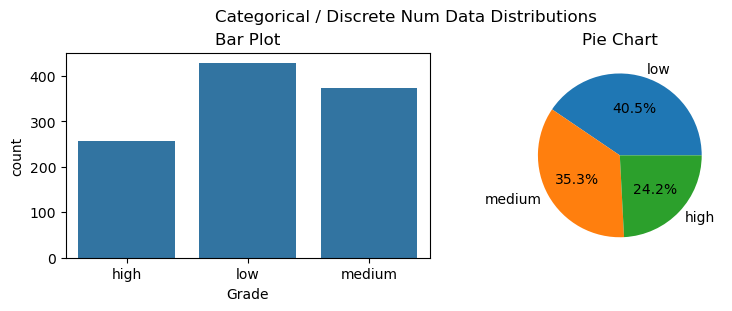

In [19]:
catg_disc_analysis(df,'Grade')

Grade(target column) object type it contain three type they are low ,medium, high.
429 as low labels, 374 as medium labels and 256 as high labels, in these three low label is more

# Bivariate Analysis

In [20]:
def cont_cont_bivar_analysis(df,col1,col2):
# This function is used to analyze the relationship between two continues columns.
  print(f"Covariance = {df[col1].cov(df[col2])}")
  #it can say if both columns are change together.
  # postive values -> they increase together.
  # negative values -> one increase the other decrease.
  print(f"Correlation = {df[col1].corr(df[col2])}")
  # it can say how strongly the two column are related.
  # +1->strong positive,-1->strong negative, 0-> no relation
  plt.figure(figsize=(3,3))
  sns.scatterplot(x=col1,y=col2,data=df)
  #it can be shows visually show the pattern between the two columns
  plt.show()

# cont - cat bivariate
def cont_cat_bivar_analysis(df,cat_col,num_col):
#This function checks how a numerical column changes across the different categories.
  plt.figure(figsize=(8,3))
  sns.boxplot(x=cat_col,y=num_col,data=df)
  # it can show how the numerical values is spread in each category

Covariance = 3.4584787696064523
Correlation = 0.2446840588473911


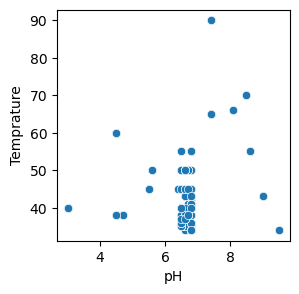

In [21]:
cont_cont_bivar_analysis(df,"pH",'Temprature')

small positive trend pH value increase ,temperature tend to increase slightly.
week positive linear relationship these two not strongly dependent on each other.
scatter plot shows most values are concentrated between pH 6 to 7 and temperature 40 to 50

Covariance = -0.9921637561561618
Correlation = -0.16456492308189108


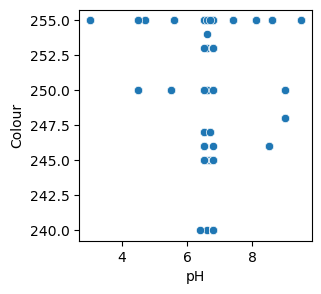

In [22]:
cont_cont_bivar_analysis(df,"pH",'Colour')

slight downward trend between ph and colour.
week negative relationship.

Covariance = -0.3702265753439298
Correlation = -0.008511359575605199


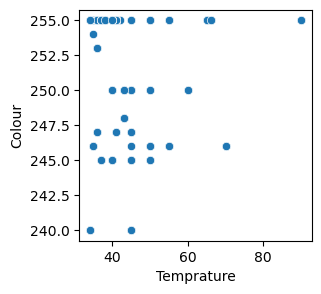

In [23]:
cont_cont_bivar_analysis(df,"Temprature",'Colour')

There is no linear relationship betwwen these two.
correlation is almost zero no relation in it

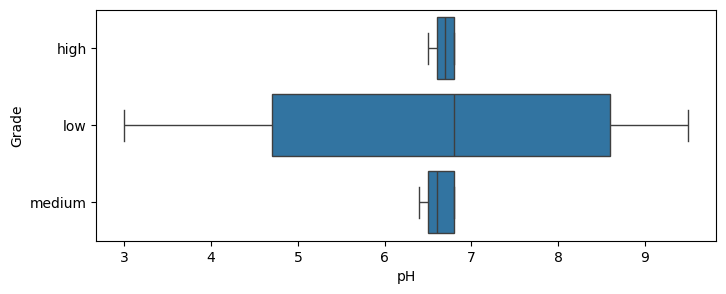

In [24]:
cont_cat_bivar_analysis(df,'pH',"Grade")

low grade sample have a wide range in ph value.
high and medium sample have a narrow pH range

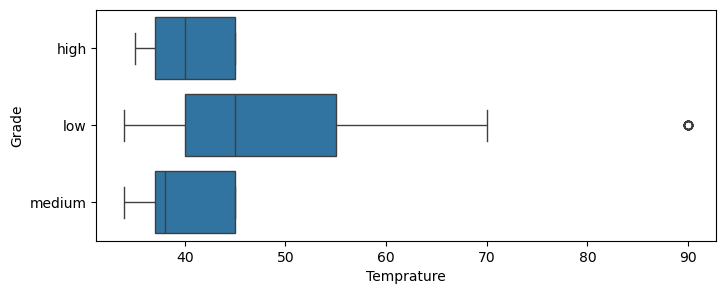

In [25]:
cont_cat_bivar_analysis(df,'Temprature',"Grade")

low grade sample have wide range with extending up 70.
high and medium sample have more consistnet value in range of 35 to 45.

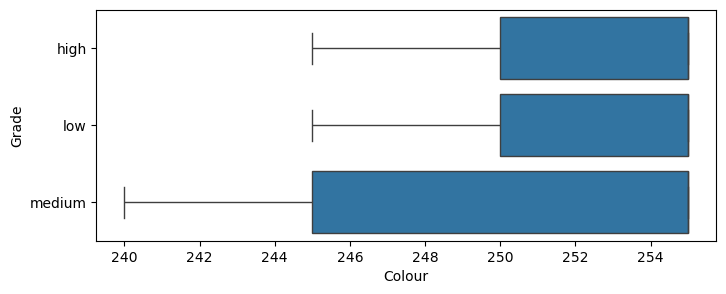

In [26]:
cont_cat_bivar_analysis(df,'Colour',"Grade")

High and low samples are similar mostly 249 to 255.
medium sample show the wide colour 240 to 255

In [28]:
def cat_cat_bivar_analysis(data,col1,col2):
# this function is used to understand the relationship between two categorical columns.
  ct_data=pd.crosstab(data[col1],data[col2])
  # it can counts how  many times each combination of col1 and col2 appears.
  ct_data.plot(kind='bar')
  # it will draw a bar on based crosstab values

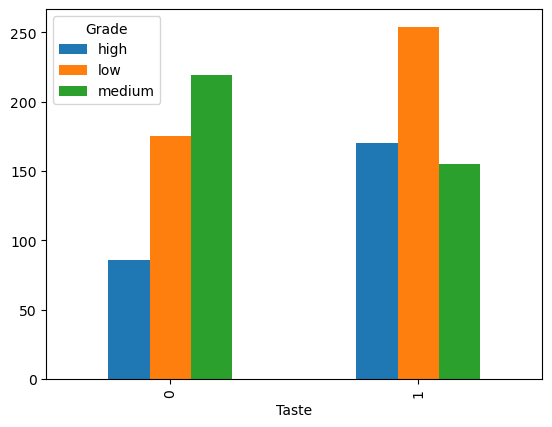

In [29]:
cat_cat_bivar_analysis(df,'Taste','Grade')

low grade is more in binary value 1 compare to binary value 0.
medium grade have more in binary value o.
high grade have more in binary value 1

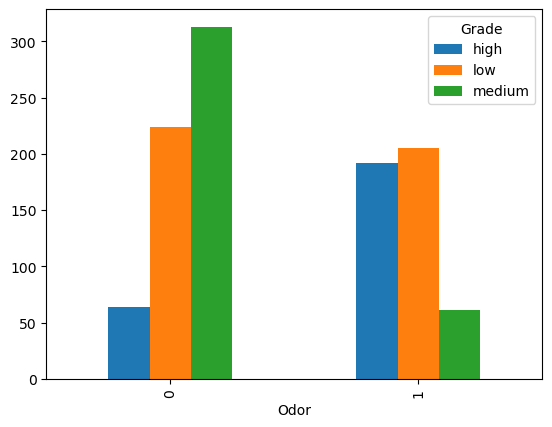

In [30]:
cat_cat_bivar_analysis(df,'Odor','Grade')

Medium garde in more in binary value o and high grade is less in binary value 0. High and Low grades are nearly same slightly low is more and medium grade is less in binary value 1

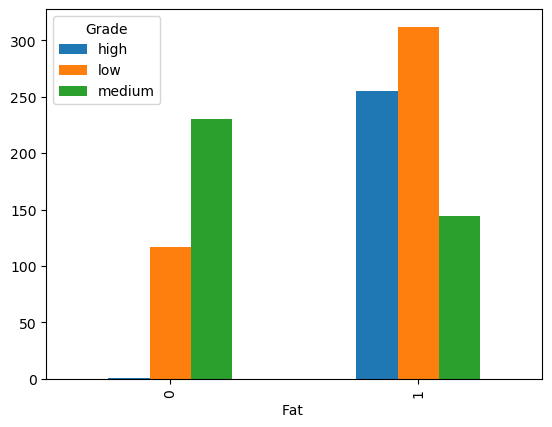

In [31]:
cat_cat_bivar_analysis(df,'Fat ','Grade')

high grade is very less and medium grade is more in binary value o . in binary value 1 low grade is more with 300+ value and medium grade is less with 160 value.

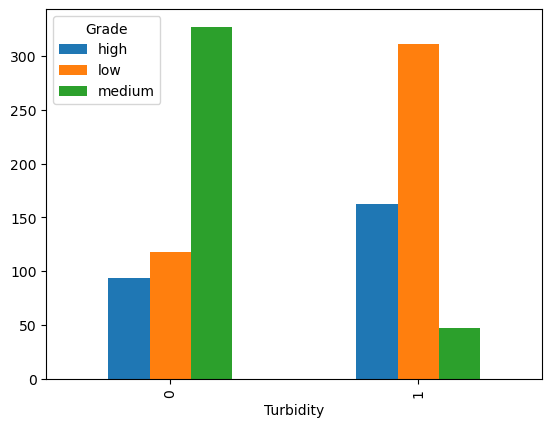

In [33]:
cat_cat_bivar_analysis(df,'Turbidity','Grade')

in binary value 0 , medium is more when compare to remain both and remaining low and high are nearly same. in binary value 1 the low is high with 300+ value and medium is less .

# Feature Encoding

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# LabelEncoder -> this is a tool that can convert text into numbers.

In [35]:
le = LabelEncoder()
# le is the object of the LabelEncoder
df["Grade"] = le.fit_transform(df["Grade"])
# Grade column changes from text to numbers.

In [36]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


The Grade column converted into numbers

In [39]:
def remove_outlier_iqr(df,column):
# This function can remove the outliers(extreamly high or low values). 
    Q1 = df[column].quantile(0.25)
    # Values below 25% of data falls.
    Q3 = df[column].quantile(0.75)
    # values below 75% of data falls.
    IQR = Q3 -Q1
    # the range betwwen Q1 and Q3 is called middle 50% of data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filter = df[(df[column] >= lower_bound) & (df[column] <=upper_bound)]
    # df_filter can take column of data which have >= lower bound and < upper bound
    return df_filter
    # return filter means return after remove outliers data
num_col_outlier = ['pH', 'Temprature', 'Colour']
# list all numeric column and store in num_col_outlier
df_clean =df.copy()
#copy the orginal data.
for col in num_col_outlier:
# go through each column in the list of num_col_outlier one by one.
    shape_before = df_clean.shape
    #to store the original data in shape_before variable
    df_clean = remove_outlier_iqr(df_clean, col)
    # call the remove_outlier_iqr function to remove the outliers
    rows_removed = shape_before[0] - df_clean.shape[0]
    # how many outliers rows are remove from the orginal data it can be calculate.
    print(f" Remove {rows_removed} outliers row based on the {col} column")
    
print(f" shape of DataFrame after removing outliers : {df_clean.shape}")

 Remove 379 outliers row based on the pH column
 Remove 0 outliers row based on the Temprature column
 Remove 0 outliers row based on the Colour column
 shape of DataFrame after removing outliers : (680, 8)


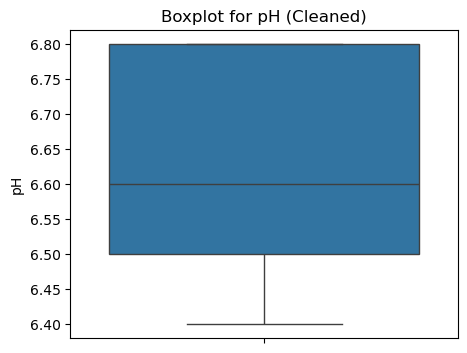

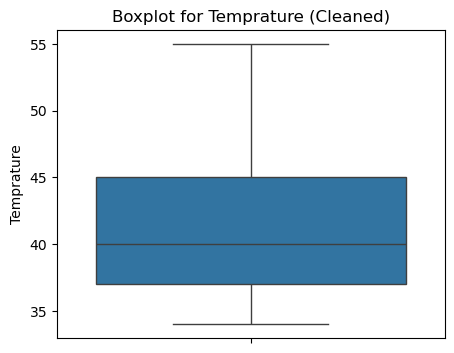

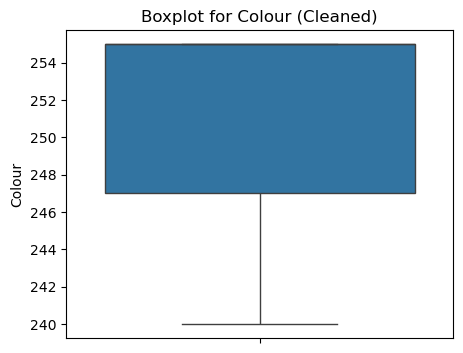

In [43]:
for col in num_col_outlier:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df_clean, y=col)
    plt.title(f'Boxplot for {col} (Cleaned)')
    plt.show()

 After remove the outlier we plot the box plot it show their there is no outliers in it 

In [44]:
df_clean

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
4,6.6,37,0,0,0,0,255,2
5,6.6,37,1,1,1,1,255,0
9,6.7,45,1,1,0,0,247,2
...,...,...,...,...,...,...,...,...
1050,6.6,37,1,1,1,1,255,0
1052,6.5,40,1,0,0,0,250,2
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0


After cleaning, label encoding and remove the outliers the dataset contain 680 row and 8 columns and it is ready for model building the machines can understand the data easly 

# Feature and Target Split

In [45]:
X = df_clean.drop('Grade', axis=1)
y = df_clean['Grade']

Before model building we have to separate the data into two parts one is features and other one is target or labels.

In [51]:
#this is the one of tool in scikit learn 
#which is split the data into 80% train and 20% test data.
from sklearn.model_selection import train_test_split

In [52]:
# it can split the data into X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(544, 7)

In [54]:
y_train.shape

(544,)

In [55]:
X_test.shape

(136, 7)

In [56]:
y_test.shape

(136,)

# Feature Scaling

Ann works better when all inputs are on the same scale so before train the model feature scale impotant

In [58]:
from sklearn.preprocessing import StandardScaler
# these one of preprocessing tool in skicit learn, it can convert all values in one scale
scaler = StandardScaler()
#scaler is the object of the of StandardScaler
X_train = scaler.fit_transform(X_train)
# it learn the mean and std of training data 
# scales the all training values so they are centered around 0 and have similar size.
X_test = scaler.transform(X_test)
# is use the same scaling values from X_train to transform X_test and it do not fit again.

In [73]:
X_train =pd.DataFrame(X_train)

In [59]:
X_train

array([[ 0.36549077, -0.62181061,  0.98178354, ...,  0.78986113,
        -0.70321085,  0.79472786],
       [ 1.17373054,  0.9227783 , -1.01855446, ..., -1.26604534,
        -0.70321085, -2.37022057],
       [ 1.17373054,  0.9227783 ,  0.98178354, ...,  0.78986113,
        -0.70321085, -1.31523776],
       ...,
       [ 1.17373054,  0.9227783 , -1.01855446, ..., -1.26604534,
         1.4220486 ,  0.79472786],
       [ 0.36549077, -0.62181061,  0.98178354, ...,  0.78986113,
        -0.70321085,  0.79472786],
       [ 0.36549077,  0.9227783 ,  0.98178354, ...,  0.78986113,
        -0.70321085, -1.31523776]])

In [60]:
X_test

array([[-1.25098875, -1.06312173, -1.01855446, -0.78373677,  0.78986113,
        -0.70321085,  0.79472786],
       [ 1.17373054, -1.06312173, -1.01855446,  1.2759386 ,  0.78986113,
        -0.70321085,  0.37273473],
       [ 0.36549077,  0.9227783 ,  0.98178354,  1.2759386 ,  0.78986113,
        -0.70321085, -1.31523776],
       [ 1.17373054,  0.9227783 , -1.01855446,  1.2759386 , -1.26604534,
        -0.70321085, -2.37022057],
       [ 0.36549077,  0.9227783 ,  0.98178354,  1.2759386 , -1.26604534,
        -0.70321085, -0.89324463],
       [-1.25098875, -0.62181061,  0.98178354,  1.2759386 ,  0.78986113,
         1.4220486 ,  0.79472786],
       [-1.25098875, -0.84246617, -1.01855446, -0.78373677, -1.26604534,
        -0.70321085,  0.79472786],
       [ 1.17373054, -0.18049949,  0.98178354, -0.78373677,  0.78986113,
        -0.70321085, -1.31523776],
       [ 1.17373054,  0.9227783 , -1.01855446,  1.2759386 , -1.26604534,
        -0.70321085, -2.37022057],
       [-0.44274899, -0.8424

# Build the ANN Model

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
model = Sequential()
# model is object of Sequential means we will add layers  one after the others.
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
# first layer of the model with 16 nodes
# input_dim=X.shape[1] -> input layer has the same no of neurins as features.
# activation function rule is commonly used in hidden layers
model.add(Dense(8, activation='relu'))
# layer 2 with 8 nodes and relu activation function
model.add(Dense(3, activation='softmax'))
# output layer with 3 nodes and activation function softmax most used in output layer.

C:\Users\lokes\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.summary()
# it will say full structure of your neural network 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# This is preapare the model for training
#loss='sparse_categorical_crossentropy' -> it say model how the measure error while learning.
#optimizer='adam' -> adam is a smart optimizer that adjust the learing rate automatically.
#metrics=['accuracy'] -> it say the model to show the accuracy during training.

In [66]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)
#starts the training of Ann model
#X_train, y_train, these both are input futures 
#epochs=50-> train the model around 50 epochs
#batch_size=10 -> train the model using 10 sample at a time.
# validation_split=0.2 -> keep 20% of the training data to test the model after each epoch

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4071 - loss: 0.9939 - val_accuracy: 0.5596 - val_loss: 0.8743
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7293 - loss: 0.7792 - val_accuracy: 0.7156 - val_loss: 0.7272
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.6940 - val_accuracy: 0.7615 - val_loss: 0.6180
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.5373 - val_accuracy: 0.7982 - val_loss: 0.5298
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.4332 - val_accuracy: 0.8624 - val_loss: 0.4683
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8975 - loss: 0.3786 - val_accuracy: 0.8624 - val_loss: 0.4128
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8832 - loss: 0.3488 - val_accuracy: 0.8624 - val_loss: 0.3701
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8931 - loss: 0.2986 - val_accuracy: 0.8716 - val_loss:

each line represents one epoch 

1.starting low accuracy with 40% and grows to 100% by epoch 40.
These model learning very well on the training data.

2.validation accuracy start at 55% and increase to 100% epoch 39 to 40.

3.Both loss and validation loss keep getting smaller .smaller loss means better predictions.

4.Training and validation accuracy are close together, especially after 10 epoch.
if training accuracy was high and validation accuracy was low, that would be overfitting

In [86]:
loss, accuracy = model.evaluate(X_test, y_test)
#test the model using test features x_test and y_test
print(f'Test Accuracy: {accuracy*100:.2f}%')
#Print the test accuracy as a percentage, rounded to 2 decimal places.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0125 
Test Accuracy: 100.00%


Test data was checked in 5 batches.

1. The model got 100% correct answers on the test data.

2. The model made very little error(0.0125) while predicting.

3. Test accuracy 100.00% so these model is perfect on the test data

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        78

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



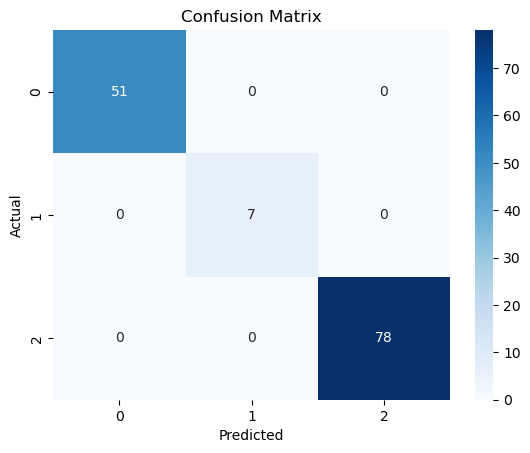

In [87]:
y_pred_probs = model.predict(X_test)
# predict on the test data
y_pred = np.argmax(y_pred_probs, axis=1)
# choose the hightest probability for test samples
print(classification_report(y_test, y_pred))
# print the precision, recal ,fi_score and accuracy
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The model predict very test sample 
Low=0, Medium = 1, High = 2.

1.class 0(low) precision is 1.00 and recall = 1.00 the model got all 
low quality milk sample coreect.

2.class 1(medium) precision is 1.00 and recall = 1.00 the model got all medium quality milk sample coreect.

3.class 2(high) precision is 1.00 and recall = 1.00 the model got all high quality milk sample coreect.


Headmap observation:

1.51 sample of the class 0 were predicted correctly.

2.7 samples of class 1 were predicted corectly.

3.78 samples of class 1 were predicted corectly.

4 there are no wrong predictio all other boxes are zero.

In [91]:
y_pred

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1,
       2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 1], dtype=int64)

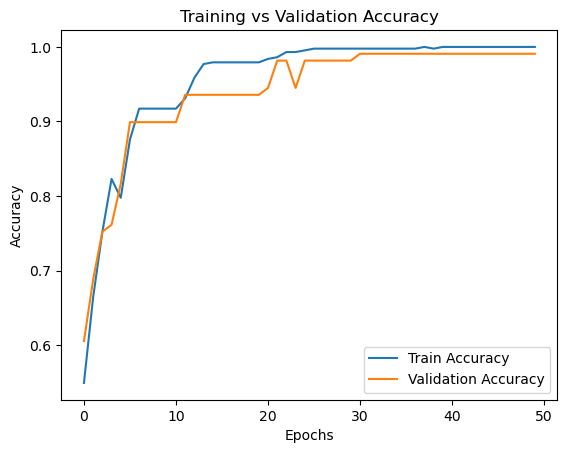

In [88]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
#draw a line for training accuray with lable is Train Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# draw a second line for validation accuracy how model well in unseen data during training
plt.xlabel('Epochs')
#x_label is epochs
plt.ylabel('Accuracy')
#y_label is accuracy
plt.legend()
# it show the labels
plt.title('Training vs Validation Accuracy')
plt.show()

Blue line is Training accuracy and orange line is orange line is validation accuracy and y axis is accuracy and x-axis is epochs.

1.accuracy improves quickly in early epochs.

2.Both lines reach around 95% to 100 accuracy which excellent.

3. the blue line goes to 100 these model learned the training perfectly.

4.Validation accuracy is slightly low but stable.

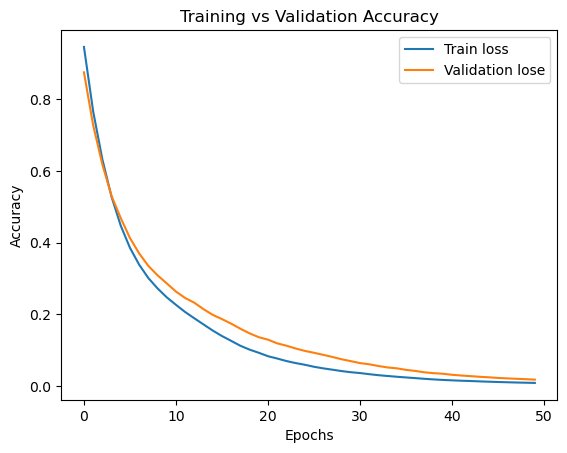

In [69]:
plt.plot(history.history['loss'], label='Train loss')
#draw a line for training loss with lable is Train loss.
plt.plot(history.history['val_loss'], label='Validation lose')
# draw a second line for validation loss how model well in unseen data during training.
plt.xlabel('Epochs')
#x_label is epochs
plt.ylabel('Accuracy')
#y_label is accuracy
plt.legend()
# it show the labels
plt.title('Training vs Validation Accuracy')
plt.show()

1.Both lines are go down over time

2.Training loss decrease smoothly.

3.validation loss also decrease

4.Both lines get very close to zero by the end

5.No overfitting.


# Conclusion of the project

In this project, I built an Artificial Neural Network (ANN) model to predict the quality of milk as Low, Medium, or High using features such as pH, temperature, taste, odor, fat, turbidity, and colour.

I started by cleaning the data, removing outliers using the IQR method, and scaling the features for better model performance. Then I designed and trained an ANN model with hidden layers and used activation functions like ReLU and Softmax.

After training, the model achieved 100% accuracy on the test data, as shown by the classification report and confusion matrix. This means the model was able to predict the correct quality for every milk sample without any mistakes.

Overall, this project shows that ANN is a very effective tool for classifying milk quality based on chemical and physical features. This kind of system can help dairy companies make faster, more accurate decisions, reduce human error, and improve quality control.

